In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers.merge import concatenate

In [3]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [4]:
mit_test_data = pd.read_csv('data/mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('data/mitbih_train.csv', header=None)

In [5]:
mit_train_data[187]=mit_train_data[187].astype(int)
equilibre=mit_train_data[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [6]:
from sklearn.utils import resample
df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

mit_train_data=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [7]:
equilibre=mit_train_data[187].value_counts()
print(equilibre)


4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(187,1)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5, activation = 'softmax'))

In [9]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 25,861
Trainable params: 25,861
Non-trainable params: 0
_________________________________________________________________


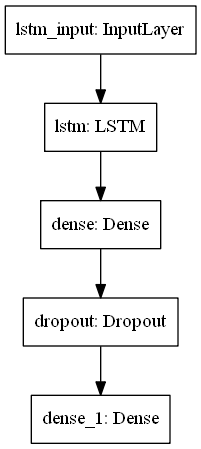

In [10]:
plot_model(lstm_model)

In [11]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras.utils import to_categorical
X, y = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]
X, valX, y, valy= train_test_split(X,y,test_size=0.2)
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]
y = to_categorical(y)
testy = to_categorical(testy)
valy=to_categorical(valy)

In [13]:
from sklearn.utils import shuffle
mit_train_data[187] = mit_train_data[187].astype('int32')
mit_test_data[187] = mit_test_data[187].astype('int32')
X_train = np.array(mit_train_data.iloc[:, :187])
X_test = np.array(mit_test_data.iloc[:, :187])
y_train = np.array(mit_train_data[187])
y_test = np.array(mit_test_data[187])
X_train, y_train = shuffle(X_train, y_train, random_state = 101)
X_test, y_test = shuffle(X_test, y_test, random_state = 101)
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 187, 1)
(21892, 187, 1)
(100000, 5)
(21892, 5)


In [14]:
lstm_model_history = lstm_model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/20
1000/1000 [==============================] - 96s 95ms/step - loss: 1.1396 - accuracy: 0.5371 - val_loss: 1.2630 - val_accuracy: 0.5087
Epoch 2/20
1000/1000 [==============================] - 94s 94ms/step - loss: 0.8727 - accuracy: 0.6774 - val_loss: 1.1244 - val_accuracy: 0.5665
Epoch 3/20
1000/1000 [==============================] - 99s 99ms/step - loss: 0.7928 - accuracy: 0.7097 - val_loss: 0.8497 - val_accuracy: 0.7286
Epoch 4/20
1000/1000 [==============================] - 105s 105ms/step - loss: 0.7420 - accuracy: 0.7335 - val_loss: 0.8627 - val_accuracy: 0.7132
Epoch 5/20
1000/1000 [==============================] - 104s 104ms/step - loss: 0.7093 - accuracy: 0.7447 - val_loss: 0.8863 - val_accuracy: 0.6975
Epoch 6/20
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6714 - accuracy: 0.7590 - val_loss: 0.6984 - val_accuracy: 0.7795
Epoch 7/20
1000/1000 [==============================] - 104s 104ms/step - loss: 0.6429 - accuracy: 0.7717 - val_loss: 

Text(0, 0.5, 'Accuracy')

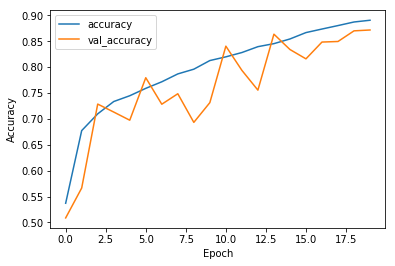

In [15]:
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

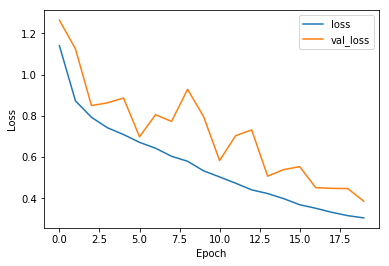

In [16]:
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [17]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=lstm_model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_true,prediction))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     18118
           1       0.26      0.78      0.39       556
           2       0.71      0.89      0.79      1448
           3       0.18      0.86      0.29       162
           4       0.89      0.96      0.92      1608

   micro avg       0.87      0.87      0.87     21892
   macro avg       0.60      0.87      0.66     21892
weighted avg       0.94      0.87      0.90     21892



In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, prediction)

0.5627626530239357

In [20]:
def evaluate_model(lstm_model_history,testX,testy,history):
    scores = model.evaluate((testX),testy, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(lstm_model_history.history['accuracy'])
    plt.plot(lstm_model_history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(lstm_model_history.history['loss'])
    plt.plot(lstm_model_history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(testX)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

Normalized confusion matrix


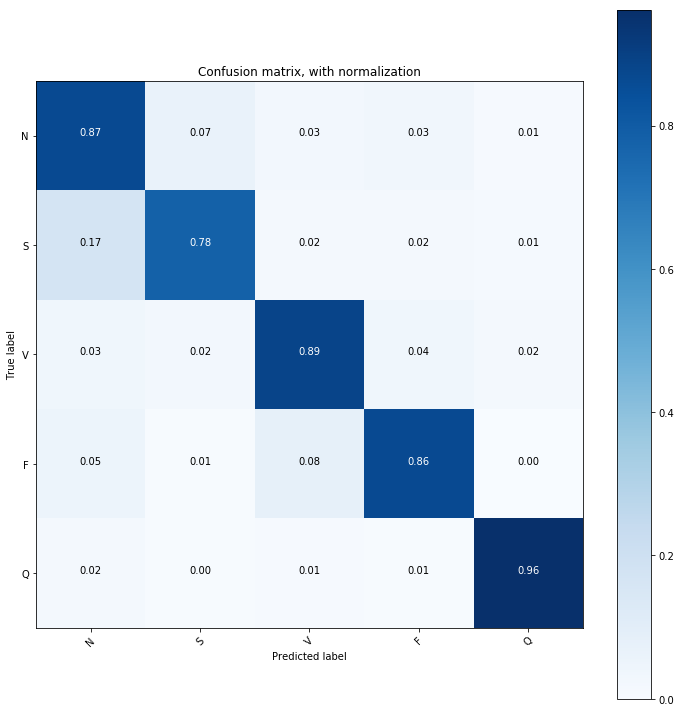

In [21]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()



In [22]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:34:26.250000
